#**Naive Bayes Classifier: Water Quality**

####The objective of the Bayesian classification model is to classify the water as safe or unsafe for consumption, based on the presence or absence of various factors affecting water quality. The model aims to identify the significant factors that impact water quality and affect its drinkability, using a probabilistic approach. The Bayesian model provides insights into the relative importance of different factors, enabling better decisions on water quality assessment and ensuring safe drinking water.

####For this analysis we will be using the following libraries: *Pandas, Scikit-Learn, Numpy and Matplotlib*

In [27]:
#Importing libraries for the Naive Bayes Classifier model 
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

#**Data Set**:
####This is a set of data created from imaginary data of water quality in an urban environment. For educational purposes only. 

####**Variables**: *aluminium,ammonia, arsenic, barium, cadmium, chloramine, chromium, copper, flouride, bacteria, viruses, lead, nitrates, nitrites, mercury, perchlorate, radium, selenium, silver, uranium, is_safe (class attribute {0 - not safe, 1 - safe})*



#**Exploratory Analysis:**

In [28]:
#Load the data from a CSV file and display the first 5 rows of the dataset

wq_df = pd.read_csv("waterQuality1.csv")
wq_df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [29]:
# Display last five rows of the dataset

wq_df.tail()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7991,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.0,...,0.197,14.29,1.0,0.005,3.57,2.13,0.09,0.06,0.03,1
7992,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.0,...,0.031,10.27,1.0,0.001,1.48,1.11,0.09,0.10,0.08,1
7993,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1
7994,0.01,10.00,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.0,...,0.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,1
7995,0.04,6.85,0.01,0.70,0.03,0.05,0.01,0.03,1.00,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1


In [30]:
# Row and columns

wq_df.shape

(7996, 21)

In [31]:
# Getting basic stats on the dataset

wq_df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [32]:
# Number of instances for is_safe (0 or 1)
# 0=FALSE not safe; 1=TRUE safe

wq_df.groupby("is_safe").size()

is_safe
0    7084
1     912
dtype: int64

In [33]:
# Checking  if there are missing values 

wq_df.isnull().any().any()

False

#**Pre-processing:**

In [34]:
# Selecting the features or independent variables and the dependent variable or target vector
# No need to change is_safe to integer

wq_df = wq_df[['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium','is_safe' ]]
wq_df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


## Defining X (independent/features) and Y (dependent/target vector) varibles:

In [35]:
# Defining X (features)

X = np.asarray(wq_df[['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']])
X[0:3]

array([[1.650e+00, 9.080e+00, 4.000e-02, 2.850e+00, 7.000e-03, 3.500e-01,
        8.300e-01, 1.700e-01, 5.000e-02, 2.000e-01, 0.000e+00, 5.400e-02,
        1.608e+01, 1.130e+00, 7.000e-03, 3.775e+01, 6.780e+00, 8.000e-02,
        3.400e-01, 2.000e-02],
       [2.320e+00, 2.116e+01, 1.000e-02, 3.310e+00, 2.000e-03, 5.280e+00,
        6.800e-01, 6.600e-01, 9.000e-01, 6.500e-01, 6.500e-01, 1.000e-01,
        2.010e+00, 1.930e+00, 3.000e-03, 3.226e+01, 3.210e+00, 8.000e-02,
        2.700e-01, 5.000e-02],
       [1.010e+00, 1.402e+01, 4.000e-02, 5.800e-01, 8.000e-03, 4.240e+00,
        5.300e-01, 2.000e-02, 9.900e-01, 5.000e-02, 3.000e-03, 7.800e-02,
        1.416e+01, 1.110e+00, 6.000e-03, 5.028e+01, 7.070e+00, 7.000e-02,
        4.400e-01, 1.000e-02]])

In [36]:
# Defining Y (Target Vector)
y = np.asarray(wq_df['is_safe'])
y[0:5]

array([1, 1, 0, 1, 1])

##Normalizing the dataset:

In [37]:
# Standarizing the dataset 

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:3]

array([[ 0.77740287, -0.58549134, -0.48087476,  1.05420463, -0.99324073,
        -0.7119415 ,  2.15299297, -0.97304989, -1.65744641, -0.36334546,
        -0.86938659, -0.78107011,  1.12976694, -0.34862871,  0.60917784,
         1.20336217,  1.66184198,  1.05369443,  1.33873624, -0.91704015],
       [ 1.30694501,  0.77511802, -0.59963176,  1.43244705, -1.13194832,
         1.20855156,  1.59876456, -0.22330291,  0.29479859,  1.00245965,
         0.84978223,  0.00978528, -1.40919722,  1.04695954, -0.73900538,
         0.89297734,  0.12481108,  1.05369443,  0.85113427,  0.19802266],
       [ 0.27157158, -0.02908321, -0.48087476, -0.81233951, -0.96549921,
         0.80341712,  1.04453616, -1.20256427,  0.50150688, -0.81861383,
        -0.86145196, -0.36844991,  0.78329848, -0.38351842,  0.27213203,
         1.91176323,  1.78669884,  0.70612871,  2.03531047, -1.28872776]])

##Splitting dataset into Test/Train sets:

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6396, 20) (6396,)
Test set: (1600, 20) (1600,)


##Creating the Machine Learning Model:

In [39]:
# Creating ML model 

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [40]:
# Making predictions using the x test portion of the dataset 

y_pred  =  classifier.predict(X_test)

In [41]:
# Printing the predictions made in the previous block 

y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [42]:
# Actual values that can be used to compare the predicted values vs the actual values 

y_test

array([1, 0, 0, ..., 0, 0, 0])

# Evaluating the ML model: 



###**Confusion Matrix**: A confusion matrix for a Naive Bayes classification model is a table that shows how the model's predicted values compare to the actual values. It consists of four cells, representing true positives, false positives, true negatives, and false negatives. The confusion matrix is a useful tool for evaluating the performance of the model and calculating performance metrics such as accuracy, precision, recall, and F1-score. It helps to determine the model's strengths and weaknesses and identify areas for improvement.

In [43]:
# Printing confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm


array([[1267,  154],
       [  72,  107]])

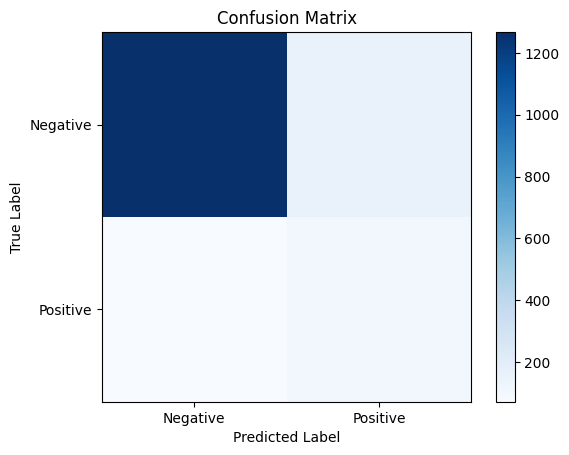

In [44]:
# plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0,1], ["Negative", "Positive"])
plt.yticks([0,1], ["Negative", "Positive"])
plt.show()

In [45]:
# Compute accuracy score

ac = accuracy_score(y_test,y_pred)
print(ac)

0.85875


##The ROC curve plots the true positive rate (TPR) on the y-axis against the false positive rate (FPR) on the x-axis for different threshold values. The AUC score is a measure of the area under the ROC curve, with a perfect classifier having an AUC score of 1.

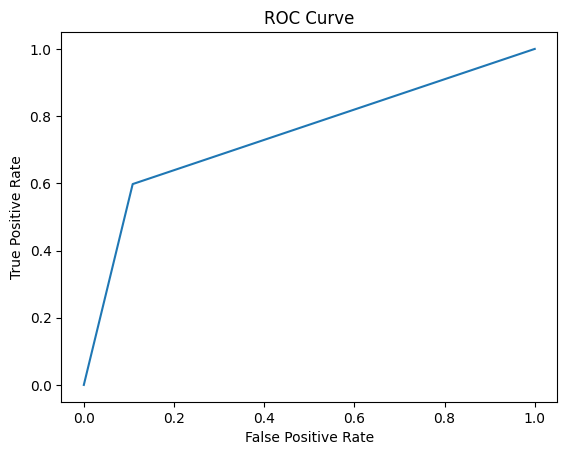

In [46]:
# Compute the false positive rate, true positive rate, and thresholds

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [47]:
# Compute AUC score
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print("AUC score:", auc)

AUC score: 0.7446954894460192


##**Decision Boundary Plot**: A decision boundary plot can be used to visualize the regions of the input feature space that are classified as belonging to different classes. It can be useful for understanding how the model is making predictions and identifying areas where the model may be uncertain.

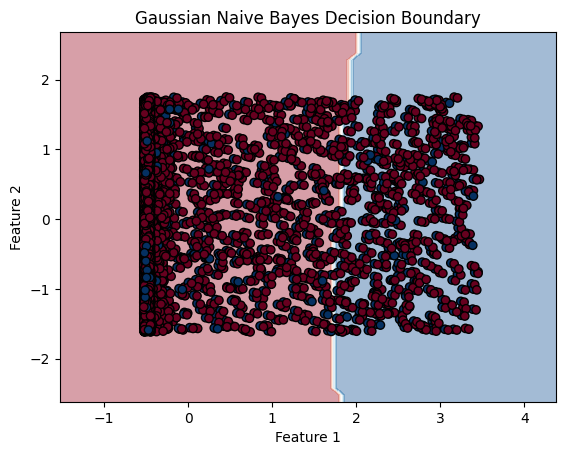

In [48]:
# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0])])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the training data
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Naive Bayes Decision Boundary')
plt.show()

